## Graph data structure
## Copyright: Jagadeesh Vasudevamurthy
## filename:graph.ipynb¶

# All import here

In [1]:
import sys # For getting Python Version
import os
import enum # For enum
import math  # for infinity
from graphviz import Source
import graphviz
import networkx as nx
print("Version of Python I am using is", sys.version)
print("Version of networkx I am using is", nx.__version__)

Version of Python I am using is 3.11.5 (main, Sep 11 2023, 08:31:25) [Clang 14.0.6 ]
Version of networkx I am using is 3.1


# Graph input and output directory setup
# YOU MUST CHANGE 2 lines below

In [2]:
inputFileBase = "/Users/yanxiaohe/Desktop/6205/Week8/data/graphdata/"
outputFileBase = "/Users/yanxiaohe/Desktop/6205/Week8/data/output/"


In [3]:
def read_dot_file(f:'string')->'dot_graph':
    filename = outputFileBase + f + ".dot"
    print(filename)
    with open(filename) as f1:
        dot_graph = f1.read()
    print(dot_graph)
    return(dot_graph)

# YOU WRITE CODE HERE

# Write Graph as a dot file

In [4]:
############################################################
# GraphDot.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2020
###########################################################

############################################################
# YOU WRITE CODE IN THIS FILE
###########################################################

############################################################
# All imports
###########################################################
#from GraphType import *  ## #Otherwise, you cannot use GraphType


class GraphDot:
    def __init__(self, g, f):
        self._g = g  # Handle to graph
        self._f = f  # File where you write graph in dot format
        self._of = open(self._f, "w")
        self._write_dot()
        self._of.close()

    ############################################################
    # Write code: _write_dot
    # Use as many private functions and prvate data you want
    ###########################################################
    def _write_dot(self):
        self._write_header()
        self._determine_graph_type()
        self._apply_styles_if_weighted()
        self._outline_graph_structure()
        self._finalize_graph()

    def _write_header(self):
        self._of.write("## Jagadeesh Vasudevamurthy ####\n")

    def _determine_graph_type(self):
        graph_type = "digraph" if self._g.is_directed_graph() else "graph"
        self._of.write(f"{graph_type} g {{\n")

    def _apply_styles_if_weighted(self):
        if self._g.is_weighted_graph():
            self._of.write("    node [shape=circle];\n")
            self._of.write("    edge [label=\"\"];\n")

    def _outline_graph_structure(self):
        connection_symbol = "->" if self._g.is_directed_graph() else "--"
        for node in self._g.list_of_nodes():
            for neighbor in self._g.fanouts_of_node(node):
                if self._g.is_directed_graph() or node <= neighbor:
                    self._add_edge(node, neighbor, connection_symbol)

    def _add_edge(self, node, neighbor, connection_symbol):
        if self._g.is_weighted_graph():
            weight = self._g.get_edge_weight(node, neighbor)
            self._of.write(f"    {node} {connection_symbol} {neighbor} [label=\"{weight}\"];\n")
        else:
            self._of.write(f"    {node} {connection_symbol} {neighbor};\n")

    def _finalize_graph(self):
        self._of.write("}\n")


# DFS USING TIME STAMP

In [5]:
############################################################
# GraphDfs.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################

############################################################
# All imports
###########################################################
#from GraphType import *  ## #Otherwise, you cannot use GraphType
#from Graph import *
#from Data import *  ##User UDT


############################################################
# Depth First serach using TimeStamp
###########################################################
class GraphDfsUsingTimeStamp:
    def __init__(
        self,
        g: "graph",
        filename: "string",
        dfs_order: "list of Nodes",
        has_loop: "list of size 1",
        work: "list of size 1",
        dfs_traversal_output_file,
    ):
        ##NOTHING CAN BE CHANGED HERE
        self._g = g
        self._f = filename
        self._dfs_order = dfs_order
        self._has_loop = has_loop
        self._has_loop[0] = False
        self._work = work
        self._work[0] = 0
        self._dfs_traversal_output_file = dfs_traversal_output_file

        ## YOU CAN has any number of private varibles and funcions
        self._visited_nodes = {node: False for node in self._g.list_of_nodes()}
        self._nodes_in_stack = {node: False for node in self._g.list_of_nodes()}

        ## Must implement two functions
        self._dfs()
        self._write_dot()

    ##########################################################
    # Write dot file of DFS traversal
    ##########################################################
    def _write_dot(self):
        output_file_path = self._dfs_traversal_output_file
        with open(output_file_path, "w") as dot_file:
            graph_type = ""
            if self._g.is_directed_graph():
                graph_type = "digraph"
            else:
                graph_type = "graph"
            dot_file.write(f"{graph_type} g {{\n")  
            
            for index, node in enumerate(self._dfs_order):
                label = f"{node} ({index + 1})"
                dot_file.write(f"    {node} [label=\"{label}\"];\n")
    
            for node in self._g.list_of_nodes():
                self.write_edges(dot_file, node)
            
            dot_file.write("}\n")
    
    def write_edges(self, dot_file, node):
            if self._g.is_directed_graph():
                connection_symbol = "->"
            else:
                connection_symbol = "--"
        
            for connected_node in self._g.fanouts_of_node(node):
                if self._g.is_directed_graph() or node <= connected_node:
                    dot_file.write(f"    {node} {connection_symbol} {connected_node};\n")
        
  

    ##########################################################
    # TIME: THETA(V + E)
    # SPACE: O(Largest path) = O(V)
    ##########################################################                    
    def _dfs_node(self, current_node, parent_node):
        self._visited_nodes[current_node] = True
        self._nodes_in_stack[current_node] = True
        self._dfs_order.append(current_node)
        for adjacent_node in self._g.fanouts_of_node(current_node):
            if not self._visited_nodes[adjacent_node]:
                self._dfs_node(adjacent_node, current_node)
            elif self._nodes_in_stack[adjacent_node] and (adjacent_node != parent_node or self._g.is_directed_graph()):
                self._has_loop[0] = True
        self._nodes_in_stack[current_node] = False
        
    def _dfs(self):
        if not self._g.is_directed_graph():
            for node in self._g.list_of_nodes():
                if not self._visited_nodes[node]:
                    self._dfs_node(node, None)
        else:
            self._process_directed_graph()

        self._work[0] = len(self._dfs_order)

    def _process_directed_graph(self):
        in_degree = {node: 0 for node in self._g.list_of_nodes()}
        for node in self._g.list_of_nodes():
            for target_node in self._g.fanouts_of_node(node):
                in_degree[target_node] += 1
        
        queue = [node for node, degree in in_degree.items() if degree == 0]
        while queue:
            current_node = queue.pop(0)
            self._dfs_order.append(current_node)
            for adjacent_node in self._g.fanouts_of_node(current_node):
                in_degree[adjacent_node] -= 1
                if in_degree[adjacent_node] == 0:
                    queue.append(adjacent_node)

        if len(self._dfs_order) != len(self._g.list_of_nodes()):
            self._has_loop[0] = True

# Dijkstra Algorithm

In [6]:
############################################################
# GraphDijkstra.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################

############################################################
# All imports
###########################################################
#from Graph import *
import heapq

############################################################
# self, gname, start_city, cost, work, dijkstra_traversal_dot_output_file
###########################################################
class GraphDijkstra:
    def __init__(
        self,
        g: "graph",
        graph_name: "string",
        start_city_name: "string",
        cost: "list of Nodes",  # FILL: cost from start city to all other city.If not reachable -1
        work: "list of size 1",  # FILL
        Dijkstra_traversal_output_file: "String",
        show: "bool",
    ):
        ##NOTHING CAN BE CHANGED HERE
        self._g = g
        self._gname = graph_name
        self._start_city_name = start_city_name
        self._cost = cost
        self._work = work
        self._work[0] = 0
        self._Dijkstra_traversal_output_file = Dijkstra_traversal_output_file
        self._show = show

        ##YOU CAN has any number of private varibles and funcions
        

        ###
        self._Dijkstra()
        # self._write_dot()

    ##########################################################
    # All private function below
    ##########################################################
    def _increment_work(self, c):
        self._work[0] = self._work[0] + c

    ##########################################################
    # Dijkstra algorithm
    ##########################################################
    import heapq
    def _Dijkstra(self):
        node_distances = {node: float('inf') for node in self._g.list_of_nodes()}
        node_distances[self._start_city_name] = 0
        visited_nodes = set()
        priority_queue = [(0, self._start_city_name)]

        while priority_queue:
            current_distance, current_node = heapq.heappop(priority_queue)
            if current_node not in visited_nodes:
                visited_nodes.add(current_node)
                
                for adjacent_node in self._g.fanouts_of_node(current_node):
                    if adjacent_node not in visited_nodes:
                        edge_weight = self._g.get_edge_weight(current_node, adjacent_node)
                        new_distance = current_distance + edge_weight

                        if new_distance < node_distances[adjacent_node]:
                            node_distances[adjacent_node] = new_distance
                            heapq.heappush(priority_queue, (new_distance, adjacent_node))

        self._update_algorithm_result(node_distances)

    def _update_algorithm_result(self, node_distances):
        self._cost[:] = [node_distances[node] if node_distances[node] != float('inf') else -1 for node in self._g.list_of_nodes()]
        self._work[0] = 1

            

## NOTHING CAN BE CHANGED BELOW

# Graph Data

In [7]:
###########################################################
# Data.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################

############################################################
# All imports
###########################################################
class Data:
    def __init__(self, n: "string"):
        self._name = n  ### _name is used as key for this object
        self.age = 100  ## To show you can have anything,

    def __hash__(self):
        t = hash(self._name)
        return t

    def __eq__(self, other: "Node") -> "bool":
        if not isinstance(other, type(self)):
            assert False
        return self._name == other._name

    def __str__(self):
        return self._name

    def get_key(self) -> "string":
        return self._name


## Graph Types

In [8]:
class GraphType(enum.Enum): 
    NONE = 0
    UNDIRECTED = 1
    DIRECTED = 2
    WEIGHTED_UNDIRECTED = 3
    WEIGHTED_DIRECTED  = 4

## Graph class

In [9]:
############################################################
# Graph.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 20203
###########################################################

############################################################
# NOTHING CAN BE CHANGED IN THIS FILE
###########################################################

############################################################
# All imports
###########################################################
'''
import networkx as nx  ##network nx graph
import math  # for infinity
from GraphType import *  ## #Otherwise, you cannot use GraphType
from Data import *  ##User UDT
from GraphBuilder import *
from GraphDot import *
from GraphShow import *
from GraphDfs import *
from GraphDijkstra import *
'''

class Graph:
    ##GRAPH DATA STRUCTURE
    def __init__(self):
        self._g = None  # networkx graph

    ############################################################
    # All Public routines. YOU SHOULD ONLY CALL THESE ROUTINES
    ###########################################################
    def is_directed_graph(self) -> "bool":
        if self._g.is_directed():
            return True
        return False

    def is_undirected_graph(self) -> "bool":
        return not (self._g.is_directed_graph())

    def is_weighted_graph(self) -> "bool":
        return nx.is_weighted(self._g)

    def get_graph_type(self) -> "GraphType":
        weighted = self.is_weighted_graph()
        if self.is_directed_graph():
            if weighted:
                return GraphType.WEIGHTED_DIRECTED
            else:
                return GraphType.DIRECTED
        if weighted:
            return GraphType.WEIGHTED_UNDIRECTED
        return GraphType.UNDIRECTED

    def get_graph_type_as_string(self) -> "string":
        t = self.get_graph_type()
        if t == GraphType.UNDIRECTED:
            return "UNDIRECTED GRAPH"
        if t == GraphType.DIRECTED:
            return "DIRECTED GRAPH"
        if t == GraphType.WEIGHTED_UNDIRECTED:
            return "WEIGHTED_UNDIRECTED GRAPH"
        if t == GraphType.WEIGHTED_DIRECTED:
            return "WEIGHTED_DIRECTED GRAPH"
        return "NONE"

    def get_node_name(self, n: "node") -> "string":
        return str(n)

    def get_edge_weight(self, f: "node1", t: "node2") -> "weight as a float":
        w = 0
        if self.is_weighted_graph():
            w = self._g.edges[f, t]["weight"]
        return w

    def get_numV(self) -> "int":
        l = self._g.number_of_nodes()
        return l

    def get_numE(self) -> "int":
        l = self._g.number_of_edges()
        return l

    def fanouts_of_node(self, n: "node") -> "list of nodes":
        if self.is_directed_graph():
            a = list(self._g.successors(n))
        else:
            a = self._g.adj[n]
        return a

    def fanins_of_node(self, n: "node") -> "list of nodes":
        assert self.is_directed_graph()
        a = list(self._g.predecessors(n))
        return a

    def num_fanout(self, n: "node") -> "int":
        a = self.fanouts_of_node(n)
        s = len(a)
        return s

    def num_fanin(self, n: "node") -> "int":
        a = self.fanins_of_node(n)
        s = len(a)
        return s

    def list_of_nodes(self) -> "list of nodes":
        l = list(self._g.nodes())
        return l

    def has_node(self, name_of_the_node: "string") -> "bool":
        l = list(self._g.nodes())
        for n in l:
            if n == name_of_the_node:
                return True
        return False

    def dump(self, name):
        print("------------", name, "------------ ")
        s = self.get_graph_type_as_string()

        print(s)
        print("Num Vertices =", self.get_numV())
        print("Num Edges    =", self.get_numE())
        nodes = self.list_of_nodes()
        for n in nodes:
            print(n, "Fanouts: ", end="")
            fanouts_of_n = self.fanouts_of_node(n)
            f = len(fanouts_of_n)
            if f == 0:
                print("NONE")
            else:
                j = 0
                for nf in fanouts_of_n:
                    if j < f - 1:
                        print(nf, ",", sep="", end="")
                    else:
                        print(nf)
                    j = j + 1
            if self.is_directed_graph():
                print(n, "Fanins: ", end="")
                fanins_of_n = self.fanins_of_node(n)
                f = len(fanins_of_n)
                if f == 0:
                    print("NONE")
                else:
                    j = 0
                    for nf in fanins_of_n:
                        if j < f - 1:
                            print(nf, ",", sep="", end="")
                        else:
                            print(nf)
                        j = j + 1

    ##########################################################
    # Nothing can be changed
    # TIME: THETA(V + E)
    # SPACE: THETA(V)
    ##########################################################
    def assert_dfs_passed(self, has_loop: "bool", dfs_order: "list of nodes"):
        t = self.get_graph_type()
        if (t == GraphType.UNDIRECTED) or (t == GraphType.WEIGHTED_UNDIRECTED):
            return
        if has_loop == False:
            set_of_visited_nodes = set()
            for n in dfs_order:
                ## Go on fanins of node
                fanins_of_n = self.fanins_of_node(n)
                for nf in fanins_of_n:
                    must_be_there = nf in set_of_visited_nodes  # find in THETA(1)
                    assert must_be_there
                set_of_visited_nodes.add(n)  # add in THETA(1)
            # All nodes must be visited
            assert len(set_of_visited_nodes) == self.get_numV()
            print("DFS ASSERT PASSED")

    ############################################################
    # All Private routines. YOU SHOULD NOT CALL THESE ROUTINES
    ###########################################################

    ############################################################
    ## All the routines written by students
    ##########################################################
    def build_graph(self, f: "file name", d: "bool"):
        b = GraphBuilder(self, f, d)  # d True means directed. False means undirected

    def write_dot(self, f):
        b = GraphDot(self, f)

    def show_dot_file(self, filename: "string"):
        with open(filename) as f:
            dot_graph = f.read()
        return dot_graph

    def dfs_using_time_stamp(
        self,
        gname: "string",
        dfs_order: "list of nodes",
        has_loop: "List of size 1 Boolean",
        work: "list of size 1",
        dfs_dot_output_file: "Traversal file name",
    ):

        b = GraphDfsUsingTimeStamp(
            self, gname, dfs_order, has_loop, work, dfs_dot_output_file
        )

    def Dijkstra(
        self,
        gname: "string",
        start_city: "String",
        cost: "list of cost",  # Caller will Fill. cost from start city to all other city.If not reachable -1
        work: "list of size 1",
        dijkstra_traversal_dot_output_file: "Traversal file name",
        show: "bool",
    ):
        b = GraphDijkstra(
            self,
            gname,
            start_city,
            cost,
            work,
            dijkstra_traversal_dot_output_file,
            show,
        )


## Graph Builder class

In [10]:
############################################################
# GraphBuilder.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################

############################################################
# YOU WRITE CODE IN THIS FILE
###########################################################

############################################################
# All imports
###########################################################
#from GraphType import *  ## #Otherwise, you cannot use GraphType


class GraphBuilder:
    def __init__(self, g: "graph", f: "string", d: "bool"):
        self._g = g
        # graph object
        self._f = f  # File from which you are building graph
        self._directed = d  # true means directed graph
        self._g._g = self._build_graph()

    ############################################################
    # Write code: build_graph
    # Use as many private functions and prvate data you want
    ###########################################################
    def _build_graph(self) -> "graph":
        notReadline = 0
        readline = 0
        if self._directed:
            g = nx.DiGraph()
        else:
            g = nx.Graph()
        with open(self._f, "r") as file:
            data = file.readlines()
            for aline in data:
                token = aline.split()
                size = len(token)
                if (size < 2) or (size > 3):
                    notReadline = notReadline + 1
                    print("NOT READ LINE", aline)
                    continue
                readline = readline + 1
                tf = token[0]
                tt = token[1]
                if size == 3:
                    #  weighted graph
                    #   Hard to debug
                    #   g.add_edge('A', 'B', weight=3)
                    tw = token[2]
                    tw_float = float(tw)
                    if g.has_edge(tf, tt):
                        w = g.edges[tf, tt]["weight"]
                        # w will be in float
                        if tw_float < w:
                            # set weight in float. Not as a string
                            g[tf][tt]["weight"] = tw_float
                    else:
                        # set weight in float. Not as a string
                        g.add_edge(tf, tt, weight=tw_float)
                else:
                    g.add_edge(tf, tt)
        return g


# DFS TESTER

In [11]:
############################################################
# GraphDfsTest.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################

############################################################
# All imports
###########################################################
'''
from GraphType import *  ## #Otherwise, you cannot use GraphType
from Graph import *
from Data import *  ##User UDT
from GraphGlobal import *
'''

class GraphDfsTest:
    def __init__(self):
        self._show = False  # Change to True for debugging
        # self._test_one()
        self._test()

    def _test1(self, gname: "graphname", directed: "bool", expected_has_loop: "Bool"):
        full_name = inputFileBase + gname + ".txt"

        print("Building graph", full_name)
        g = Graph()
        g.build_graph(full_name,directed)
        if self._show:
            g.dump(full_name)

        dot_output_file = outputFileBase + gname + ".dot"
        g.write_dot(dot_output_file)

        dfs_order = []  # Caller will Fill. List of Nodes
        has_loop = [False]  # List of size 1
        work = [0]  # List of size 1
        dfs_dot_output_file = outputFileBase + gname + "dfs.dot"
        g.dfs_using_time_stamp(gname, dfs_order, has_loop, work, dfs_dot_output_file)

        print("DFS traversal is in")
        print(dfs_dot_output_file)

        print("DFS ORDER: ", end=" ")
        for node in dfs_order:
            p1 = g.get_node_name(node)
            print(p1, end=" ")
        print()

        if has_loop[0]:
            print("LOOP")
        else:
            print("NOLOOP")
        print("Work Done", work[0])
        assert has_loop[0] == expected_has_loop
        g.assert_dfs_passed(has_loop[0],dfs_order)

    def _test_one(self):
        g = [
            ["1", GraphType.UNDIRECTED, False],
        ]

        for g1 in g:
            self._test1(g1[0], g1[1], g1[2])

    def _test(self):
        g = [
            ["u1", False, False],
            ["1", False, False],
            ["udf1", True, True],
            ["2", True, False],
            ["3", True, True],
            ["cat", True, False],
            ["7", True, False],
        ]

        for g1 in g:
            self._test1(g1[0], g1[1], g1[2])


# Dijkstra Tester

In [12]:
############################################################
# GraphDijkstraTest.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################

############################################################
# All imports
###########################################################
'''
from GraphType import *  ## #Otherwise, you cannot use GraphType
from Graph import *
from GraphDijkstra import *
'''

class GraphGraphDijkstraTest:
    def __init__(self):
        self._show = False  # Change to True for debugging
        self._test()

    def _test(self):
        n = ["7", "loopparallel", "17", "hd1", "hd2", "hd3", "g1"]
        t = [
            GraphType.WEIGHTED_DIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_DIRECTED,
        ]
        s = ["0", "s", "A", "17", "60", "85", "P"]  # starting city
        w0 = [0.0, 5.0, 3.0, 9.0, 13.0, 8.0, 7.0]
        w1 = [0.0, 1.0, 6.0, 7.0]  # networkx issue
        # w1 = [0.0, 2.0, 7.0, 10.0]
        w2 = [2.0, 7.0, 5.0, 1.0, 3.0, 7.0, 0.0]
        w3 = [
            20.0,
            22.0,
            25.0,
            27.0,
            25.0,
            68.0,
            86.0,
            39.0,
            70.0,
            36.0,
            53.0,
            91.0,
            35.0,
            88.0,
            30.0,
            43.0,
            0.0,
            54.0,
            74.0,
            41.0,
        ]
        w4 = [
            9.0,
            13.0,
            8.0,
            10.0,
            8.0,
            5.0,
            8.0,
            5.0,
            12.0,
            1.0,
            7.0,
            15.0,
            4.0,
            8.0,
            9.0,
            4.0,
            11.0,
            1.0,
            4.0,
            12.0,
            9.0,
            11.0,
            7.0,
            9.0,
            10.0,
            9.0,
            7.0,
            10.0,
            5.0,
            10.0,
            11.0,
            9.0,
            1.0,
            7.0,
            12.0,
            6.0,
            12.0,
            15.0,
            10.0,
            11.0,
            15.0,
            6.0,
            10.0,
            7.0,
            9.0,
            7.0,
            7.0,
            14.0,
            5.0,
            13.0,
            8.0,
            8.0,
            10.0,
            7.0,
            4.0,
            6.0,
            3.0,
            8.0,
            11.0,
            11.0,
            12.0,
            4.0,
            9.0,
            9.0,
            7.0,
            7.0,
            7.0,
            0.0,
            13.0,
            6.0,
            7.0,
            8.0,
            8.0,
            3.0,
            5.0,
            6.0,
            11.0,
            5.0,
        ]
        w5 = [
            154.0,
            98.0,
            90.0,
            49.0,
            186.0,
            190.0,
            178.0,
            114.0,
            123.0,
            -1.0,
            -1.0,
            -1.0,
            123.0,
            -1.0,
            104.0,
            -1.0,
            -1.0,
            -1.0,
            207.0,
            134.0,
            123.0,
            75.0,
            155.0,
            -1.0,
            198.0,
            68.0,
            90.0,
            170.0,
            135.0,
            -1.0,
            103.0,
            145.0,
            -1.0,
            54.0,
            111.0,
            163.0,
            173.0,
            115.0,
            87.0,
            159.0,
            -1.0,
            94.0,
            102.0,
            -1.0,
            76.0,
            67.0,
            167.0,
            138.0,
            216.0,
            -1.0,
            172.0,
            102.0,
            212.0,
            163.0,
            103.0,
            112.0,
            -1.0,
            182.0,
            145.0,
            92.0,
            -1.0,
            -1.0,
            194.0,
            -1.0,
            182.0,
            -1.0,
            201.0,
            96.0,
            -1.0,
            85.0,
            121.0,
            108.0,
            161.0,
            130.0,
            100.0,
            120.0,
            -1.0,
            118.0,
            215.0,
            92.0,
            156.0,
            162.0,
            163.0,
            168.0,
            0.0,
            71.0,
            110.0,
            -1.0,
            -1.0,
            190.0,
            217.0,
            100.0,
            105.0,
            178.0,
        ]
        w6 = [0.0, 1.0, 4.0, 4.0, 2.0, 3.0]
        w = [w0, w1, w2, w3, w4, w5, w6]

        n1 = len(n)
        t1 = len(t)
        s1 = len(s)
        d1 = len(w)
        assert n1 == t1
        assert n1 == s1
        assert n1 == d1
        for i in range(n1):
            gname = n[i]
            start_city = s[i]
            expected_cost_array = w[i]
            print("------------- ", gname, " ------------")
            full_name = inputFileBase + gname + ".txt"
            g = Graph()
            directed = True
            if t[i] == GraphType.WEIGHTED_UNDIRECTED:
                directed = False
            g.build_graph(full_name, directed)
            if self._show:
                g.dump(full_name)
                dot_output_file = outputFileBase + gname + ".dot"
                g.write_dot(dot_output_file)

            cost = (
                []
            )  # Caller will Fill. cost from start city to all other city.If not reachable -1
            work = [0]  # List of size 1
            dijkstra_traversal_dot_output_file = outputFileBase + gname + "dijkstra.dot"
            show = False
            if g.get_numV() < 21:
                show = True
            g.Dijkstra(
                gname, start_city, cost, work, dijkstra_traversal_dot_output_file, show
            )
            # assert answers
            print("Expected cost = ", expected_cost_array)
            print("Your answer    = ", cost)
            assert len(cost) == len(expected_cost_array)
            x = 0
            for j in range(len(cost)):
                if cost[j] != expected_cost_array[j]:
                    x = x + 1
            print("Failed ", x)
            assert x == 0  # NO failure can happen


# Graph Representation Tester

In [13]:
############################################################
# GraphRepresentationTest.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################

############################################################
# All imports
###########################################################
#from GraphType import *  ## #Otherwise, you cannot use GraphType
#from Graph import *


class GraphRepresentationTest:
    def __init__(self):
        self._test()

    def _u1(self):
        name = "13"
        f = inputFileBase + name + ".txt"
        g = Graph()
        g.build_graph(f, False)
        g.dump(name)
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 7
        assert g.get_numE() == 12

    def _uw1(self):
        name = "14"
        f = inputFileBase + name + ".txt"
        g = Graph()
        g.build_graph(f, False)
        g.dump(name)
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 6
        assert g.get_numE() == 10

    def _d1(self):
        name = "15"
        f = inputFileBase + name + ".txt"
        g = Graph()
        g.build_graph(f, True)
        g.dump(name)
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 6
        assert g.get_numE() == 6

    def _dw1(self):
        name = "16"
        f = inputFileBase + name + ".txt"
        g = Graph()
        g.build_graph(f, True)
        g.dump(name)
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 5
        assert g.get_numE() == 6

    def _DAG(self):
        name = "cat"
        f = inputFileBase + name + ".txt"
        g = Graph()
        g.build_graph(f, True)
        g.dump(name)
        # g.show_graph()
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 6
        assert g.get_numE() == 7
        
    def _loop(self):
        name = "loopparallel"
        f = inputFileBase + name + ".txt"
        g = Graph()
        g.build_graph(f, True)
        g.dump(name)
        # g.show_graph()
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        #assert g.get_numV() == 6
        #assert g.get_numE() == 7

    def _test(self):
        self._u1()
        self._uw1()
        self._d1()
        self._dw1()
        self._DAG()
        self._loop()


# Graph tester

In [14]:
############################################################
# GraphTest.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################

############################################################
# All imports
###########################################################
'''
import sys  # For getting Python Version
import enum
from GraphType import *  ## #Otherwise, you cannot use GraphType
from Graph import *
from GraphRepresentationTest import *
from GraphDfsTest import *
'''
class GraphTest:
    def __init__(self):
        pass

    def RepresentationTest(self):
        t = GraphRepresentationTest()

    def DFS(self):
        t = GraphDfsTest()

    def Dijkstra(self):
        t = GraphGraphDijkstraTest()

# Main

In [15]:
############################################################
# main 
# YOU CANNOT CHANGE ANYTHING BELOW
###########################################################
def main():
    print(sys.version)
    t = GraphTest()
    a = [0, 1, 0]
    if a[0]:
        t.RepresentationTest()
        print("test_graph_representation Passed")
    if a[1]:
        t.DFS()
        print("DFS Passed")
    if a[2]:
        t.Dijkstra()
        print("Dijkstra Passed. You are genius if all tests are passed")
        print("Can you rate me at: https://www.linkedin.com/in/jagadeesh-vasudevamurthy-6796591/")


# call Main

In [16]:
############################################################
# start up
###########################################################
if (__name__  == '__main__'):
      main()

3.11.5 (main, Sep 11 2023, 08:31:25) [Clang 14.0.6 ]
Building graph /Users/yanxiaohe/Desktop/6205/Week8/data/graphdata/u1.txt
DFS traversal is in
/Users/yanxiaohe/Desktop/6205/Week8/data/output/u1dfs.dot
DFS ORDER:  0 1 
NOLOOP
Work Done 2
Building graph /Users/yanxiaohe/Desktop/6205/Week8/data/graphdata/1.txt
DFS traversal is in
/Users/yanxiaohe/Desktop/6205/Week8/data/output/1dfs.dot
DFS ORDER:  1 2 3 4 5 
NOLOOP
Work Done 5
Building graph /Users/yanxiaohe/Desktop/6205/Week8/data/graphdata/udf1.txt
NOT READ LINE 

DFS traversal is in
/Users/yanxiaohe/Desktop/6205/Week8/data/output/udf1dfs.dot
DFS ORDER:  
LOOP
Work Done 0
Building graph /Users/yanxiaohe/Desktop/6205/Week8/data/graphdata/2.txt
DFS traversal is in
/Users/yanxiaohe/Desktop/6205/Week8/data/output/2dfs.dot
DFS ORDER:  1 2 3 4 5 
NOLOOP
Work Done 5
DFS ASSERT PASSED
Building graph /Users/yanxiaohe/Desktop/6205/Week8/data/graphdata/3.txt
DFS traversal is in
/Users/yanxiaohe/Desktop/6205/Week8/data/output/3dfs.dot
DFS ORDER:

# Uncomment Only Lines 

/Users/yanxiaohe/Desktop/6205/Week8/data/output/13.dot
## Jagadeesh Vasudevamurthy ####
graph g {
    1 -- 2;
    1 -- 3;
    1 -- 4;
    2 -- 5;
    2 -- 4;
    3 -- 6;
    3 -- 4;
    4 -- 5;
    4 -- 7;
    4 -- 6;
    5 -- 7;
    6 -- 7;
}



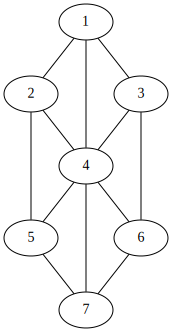

In [17]:
Source(read_dot_file("13"))

/Users/yanxiaohe/Desktop/6205/Week8/data/output/14.dot
## Jagadeesh Vasudevamurthy ####
graph g {
    node [shape=circle];
    edge [label=""];
    1 -- 2 [label="6.2"];
    1 -- 3 [label="1.2"];
    1 -- 4 [label="5.0"];
    2 -- 3 [label="5.2"];
    2 -- 5 [label="3.2"];
    3 -- 4 [label="5.0"];
    3 -- 5 [label="4.0"];
    3 -- 6 [label="4.0"];
    4 -- 6 [label="2.0"];
    5 -- 6 [label="6.0"];
}



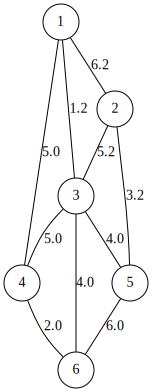

In [18]:
Source(read_dot_file("14"))

/Users/yanxiaohe/Desktop/6205/Week8/data/output/15.dot
## Jagadeesh Vasudevamurthy ####
digraph g {
    A -> B;
    B -> C;
    E -> F;
    E -> D;
    D -> B;
    C -> E;
}



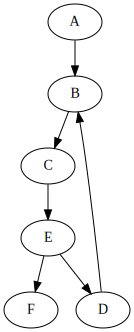

In [19]:
Source(read_dot_file("15"))

/Users/yanxiaohe/Desktop/6205/Week8/data/output/16.dot
## Jagadeesh Vasudevamurthy ####
digraph g {
    node [shape=circle];
    edge [label=""];
    A -> C [label="12.8"];
    A -> D [label="60.0"];
    C -> B [label="20.0"];
    C -> D [label="32.9"];
    B -> A [label="10.0"];
    E -> A [label="7.0"];
}



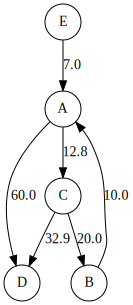

In [20]:
Source(read_dot_file("16"))

/Users/yanxiaohe/Desktop/6205/Week8/data/output/cat.dot
## Jagadeesh Vasudevamurthy ####
digraph g {
    Bar -> Bat;
    Cab -> Car;
    Cab -> Cat;
    Car -> Bar;
    Mat -> Bat;
    Cat -> Mat;
    Cat -> Bat;
}



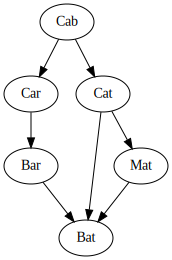

In [21]:
Source(read_dot_file("cat"))

/Users/yanxiaohe/Desktop/6205/Week8/data/output/loopparallel.dot
## Jagadeesh Vasudevamurthy ####
digraph g {
    node [shape=circle];
    edge [label=""];
    s -> 0 [label="1.0"];
    0 -> 1 [label="5.0"];
    1 -> 1 [label="3.0"];
    1 -> t [label="1.0"];
}



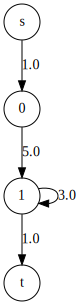

In [22]:
Source(read_dot_file("loopparallel"))

# DFS TRAVERSAL

/Users/yanxiaohe/Desktop/6205/Week8/data/output/u1dfs.dot
graph g {
    0 [label="0 (1)"];
    1 [label="1 (2)"];
    0 -- 1;
}



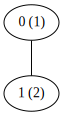

In [23]:
Source(read_dot_file("u1dfs"))

/Users/yanxiaohe/Desktop/6205/Week8/data/output/1dfs.dot
graph g {
    1 [label="1 (1)"];
    2 [label="2 (2)"];
    3 [label="3 (3)"];
    4 [label="4 (4)"];
    5 [label="5 (5)"];
    1 -- 2;
    1 -- 3;
    3 -- 4;
    3 -- 5;
}



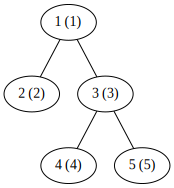

In [24]:
Source(read_dot_file("1dfs"))

/Users/yanxiaohe/Desktop/6205/Week8/data/output/udf1dfs.dot
digraph g {
    0 -> 1;
    1 -> 3;
    3 -> 5;
    3 -> 2;
    5 -> 4;
    4 -> 2;
    2 -> 0;
}



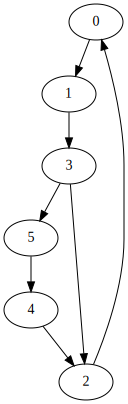

In [25]:
Source(read_dot_file("udf1dfs"))

/Users/yanxiaohe/Desktop/6205/Week8/data/output/2dfs.dot
digraph g {
    1 [label="1 (1)"];
    2 [label="2 (2)"];
    3 [label="3 (3)"];
    4 [label="4 (4)"];
    5 [label="5 (5)"];
    1 -> 2;
    1 -> 3;
    2 -> 4;
    3 -> 4;
    4 -> 5;
}



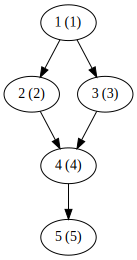

In [26]:
Source(read_dot_file("2dfs"))

/Users/yanxiaohe/Desktop/6205/Week8/data/output/3dfs.dot
digraph g {
    0 [label="0 (1)"];
    1 [label="1 (2)"];
    0 -> 1;
    0 -> 2;
    1 -> 3;
    2 -> 3;
    3 -> 4;
    4 -> 2;
}



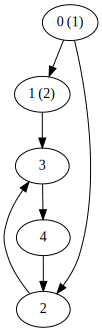

In [27]:
Source(read_dot_file("3dfs"))

/Users/yanxiaohe/Desktop/6205/Week8/data/output/catdfs.dot
digraph g {
    Cab [label="Cab (1)"];
    Car [label="Car (2)"];
    Cat [label="Cat (3)"];
    Bar [label="Bar (4)"];
    Mat [label="Mat (5)"];
    Bat [label="Bat (6)"];
    Bar -> Bat;
    Cab -> Car;
    Cab -> Cat;
    Car -> Bar;
    Mat -> Bat;
    Cat -> Mat;
    Cat -> Bat;
}



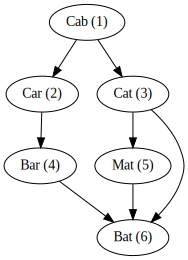

In [28]:
Source(read_dot_file("catdfs"))

/Users/yanxiaohe/Desktop/6205/Week8/data/output/7dfs.dot
digraph g {
    0 [label="0 (1)"];
    3 [label="3 (2)"];
    2 [label="2 (3)"];
    1 [label="1 (4)"];
    5 [label="5 (5)"];
    4 [label="4 (6)"];
    6 [label="6 (7)"];
    0 -> 2;
    0 -> 3;
    0 -> 1;
    2 -> 5;
    2 -> 4;
    3 -> 2;
    3 -> 4;
    3 -> 1;
    1 -> 6;
    1 -> 4;
    4 -> 6;
    5 -> 6;
}



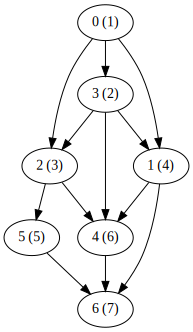

In [29]:
Source(read_dot_file("7dfs"))